## **CNN/CovNet**

## **The Fashion-MNIST Data Set**

Zalando's article image, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images and 10,000 testing images.

In [ ]:
pip show keras

Name: keras
Version: 2.9.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.layers import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings('ignore')
(train_X,train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## **Analyze the Data**

In [ ]:
print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [ ]:
#Find the unique numbers from the train labels\
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)


Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground truth: 9')

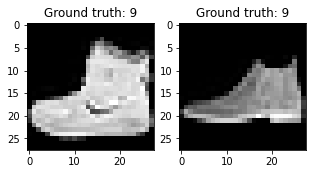

In [ ]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title('Ground truth: {}'.format(train_Y[0]))

#Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title('Ground truth: {}'.format(test_Y[0]))

## **Data Preprocessing**

In [ ]:
#normalizing data
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#Display the change for category label using one-hot encoding
print('Original label: ', train_Y[0])
print('After conversion to one-hot: ',train_Y_one_hot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

## **Building CNN Architecture**

Images are size 28x28. Converted image matrix to an array, rescaled it between 0 and 1, reshape it so that its size is 28x28x1.

3 convolutional layers:

1.first layer = 32-3x3 filters <br>
2.second layer = 64-3x3 filters <br>
3.third layer = 128-3x3 filters

3 max-pooling layers each of size 2x2

In [ ]:
#Define Input Parameters

batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
from tensorflow.keras.layers import LeakyReLU

#Convolution layer

fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(64, (3,3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Conv2D(128,(3,3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())

#Fully connected layer
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#Compile the model

fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [ ]:
(3*3*32+1)*64

18496

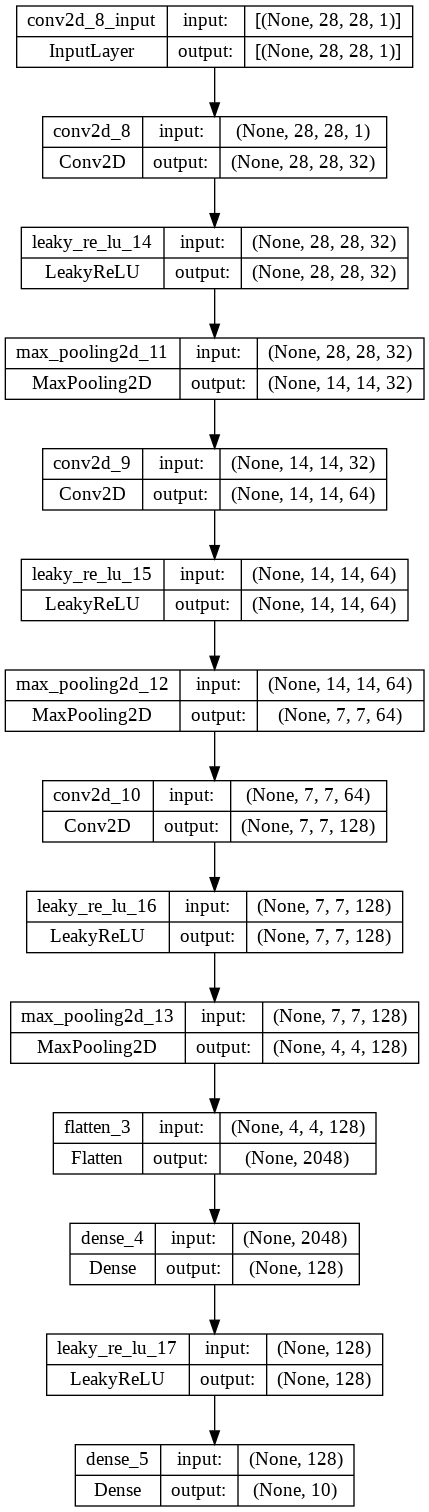

In [ ]:
plot_model(fashion_model, to_file='mlp-mnist.png',show_shapes=True)

## **Train the Model**

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 99s 131ms/step - loss: 0.6308 - accuracy: 0.8361 - val_loss: 0.3154 - val_accuracy: 0.8855
Epoch 2/20
750/750 [==============================] - 91s 121ms/step - loss: 0.2954 - accuracy: 0.8913 - val_loss: 0.3063 - val_accuracy: 0.8914
Epoch 3/20
750/750 [==============================] - 91s 122ms/step - loss: 0.2507 - accuracy: 0.9070 - val_loss: 0.2885 - val_accuracy: 0.8962
Epoch 4/20
750/750 [==============================] - 94s 125ms/step - loss: 0.2233 - accuracy: 0.9176 - val_loss: 0.3031 - val_accuracy: 0.8959
Epoch 5/20
750/750 [==============================] - 92s 123ms/step - loss: 0.2091 - accuracy: 0.9224 - val_loss: 0.2659 - val_accuracy: 0.9080
Epoch 6/20
750/750 [==============================] - 95s 127ms/step - loss: 0.1859 - accuracy: 0.9309 - val_loss: 0.3936 - val_accuracy: 0.8726
Epoch 7/20
750/750 [==============================] - 92s 122ms/step - loss: 0.1726 - accuracy: 0.9365 - val_loss: 0.3160 - val_ac

## **Model Evaluation on the Test Set**

In [ ]:
test_eval = fashion_model.evaluate(test_X,test_Y_one_hot,verbose=0)

In [ ]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ',test_eval[1])

Test loss:  0.4805268943309784
Test accuracy:  0.9092000126838684


In [ ]:
fashion_train.history

{'loss': [0.6308467388153076,
  0.2953532636165619,
  0.25069770216941833,
  0.2233157753944397,
  0.20905831456184387,
  0.18589910864830017,
  0.17259962856769562,
  0.16700519621372223,
  0.15473027527332306,
  0.13781489431858063,
  0.13387568295001984,
  0.1259983777999878,
  0.11233849078416824,
  0.1092698946595192,
  0.09966640919446945,
  0.09620162099599838,
  0.08927600830793381,
  0.0832580029964447,
  0.0890246257185936,
  0.08758947998285294],
 'accuracy': [0.836104154586792,
  0.8912708163261414,
  0.9069583415985107,
  0.9176250100135803,
  0.9223750233650208,
  0.9308541417121887,
  0.9364583492279053,
  0.9374374747276306,
  0.9435416460037231,
  0.9474583268165588,
  0.9501875042915344,
  0.9537500143051147,
  0.957979142665863,
  0.96072918176651,
  0.9630833268165588,
  0.9655208587646484,
  0.9671458601951599,
  0.9699375033378601,
  0.968916654586792,
  0.9700000286102295],
 'val_loss': [0.31536582112312317,
  0.3063431978225708,
  0.28852379322052,
  0.303126126

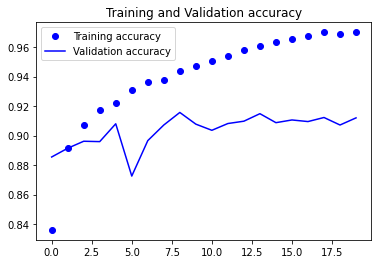

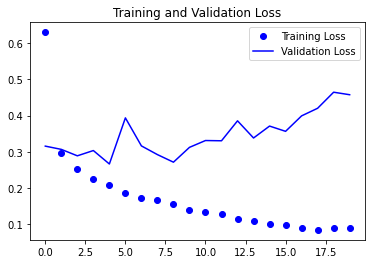

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## **Adding Dropout into the Network**

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
#Convolutional Layer
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())

#Fully Connected Layer
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [ ]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 104s 138ms/step - loss: 1.1022 - accuracy: 0.7147 - val_loss: 0.4505 - val_accuracy: 0.8424
Epoch 2/20
750/750 [==============================] - 100s 133ms/step - loss: 0.4755 - accuracy: 0.8268 - val_loss: 0.3555 - val_accuracy: 0.8717
Epoch 3/20
750/750 [==============================] - 100s 134ms/step - loss: 0.4067 - accuracy: 0.8530 - val_loss: 0.3109 - val_accuracy: 0.8856
Epoch 4/20
750/750 [==============================] - 104s 138ms/step - loss: 0.3763 - accuracy: 0.8629 - val_loss: 0.2972 - val_accuracy: 0.8903
Epoch 5/20
750/750 [==============================] - 101s 135ms/step - loss: 0.3547 - accuracy: 0.8690 - val_loss: 0.2843 - val_accuracy: 0.8970
Epoch 6/20
750/750 [==============================] - 101s 134ms/step - loss: 0.3452 - accuracy: 0.8729 - val_loss: 0.2904 - val_accuracy: 0.8917
Epoch 7/20
750/750 [==============================] - 103s 138ms/step - loss: 0.3283 - accuracy: 0.8790 - val_loss: 0.2714 -

In [ ]:
test_val = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

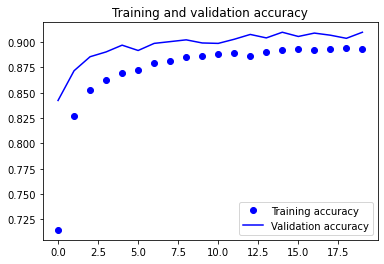

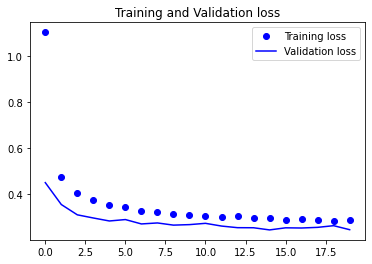

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()